In [2]:
from manim import *
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching para_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s para_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.11


Output saved by creating file at animations/parametrization/parametrization.mp4.


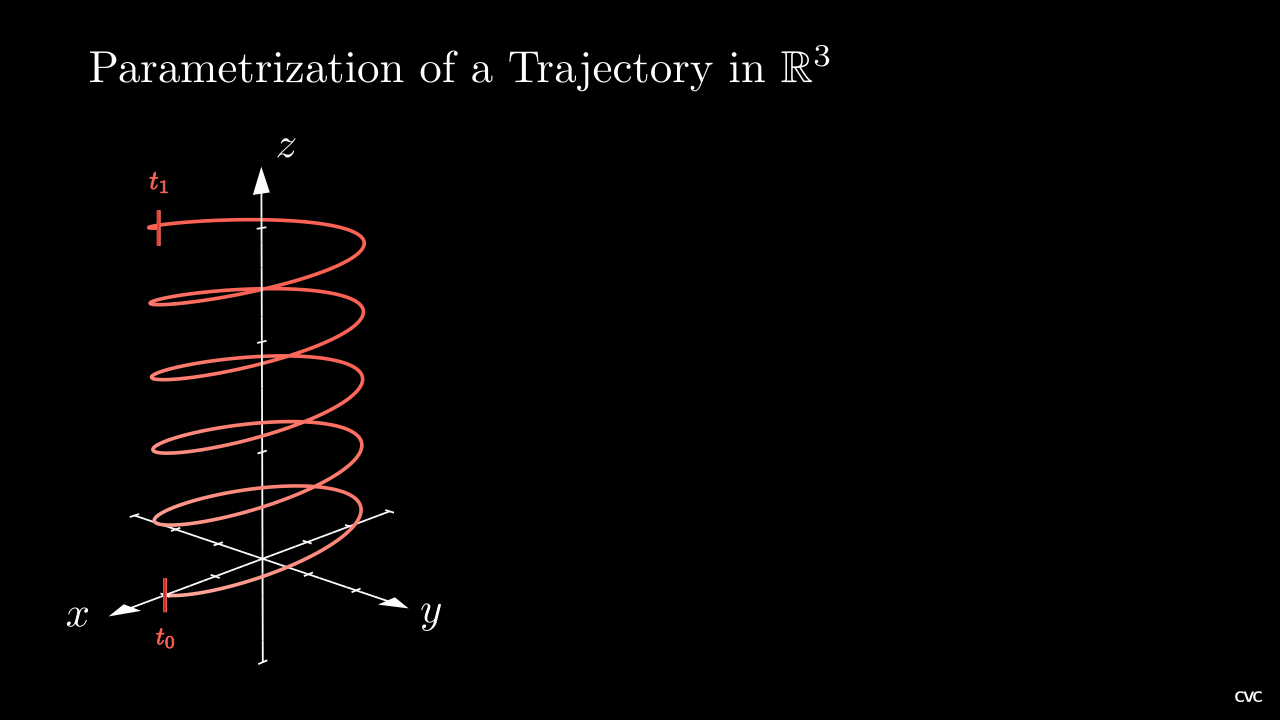

In [81]:
%%capture_video --path "animations/parametrization/parametrization.mp4"
%%manim -qm --fps 60 $video_scene

class para_Scene(ThreeDScene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

         # Headline
        text_parametrization = Tex(r"Parametrization of a Trajectory in $\mathbb{R}^3$", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)


        # 3D-Coordinate System
        CO3D = [-6, -1, -8]
        CO3D_x_range = (-3, 3, 1)
        CO3D_y_range = (-3, 3, 1)
        CO3D_z_range = (-1, 3.5, 1)
        ax = ThreeDAxes(
            x_range = CO3D_x_range, y_range = CO3D_y_range, z_range = CO3D_z_range,
            x_length = 6, y_length = 6, z_length = 8, axis_config = {'tip_length': 0.05, 'tip_width': 0.3}, 
            z_axis_config = {'color': WHITE},
            ).move_to(CO3D).rotate(
                axis = [1, 0, 0], angle = 6*PI/4
                ).rotate(
                    axis = [0, 1, 0], angle = 5*PI/4
                    ).rotate(axis = [1, 0, 0], angle = PI/12).rotate(
                        axis = [0, 1, 0], angle = PI/16
                        )
        x_lab = Tex('$x$', font_size = 64).move_to(CO3D).shift(3*DOWN + 2.75*LEFT)
        y_lab = Tex('$y$', font_size = 64).move_to(CO3D).shift(3*DOWN + 2.75*RIGHT)
        z_lab = Tex('$z$', font_size = 64).move_to(CO3D + 0.5*RIGHT).shift(4.3*UP)
        ax_3D = VGroup(ax, x_lab, y_lab, z_lab)


        # Parametric Function for ax
        def para_func(t):
            x = 2 * np.cos(t)
            y = 1 * np.sin(t)
            z = 0.1 * t
            return ax.c2p(x, y, z)

        # Function start and end
        t0 = 0
        t1 = 10 * PI

        para_curve = ParametricFunction(para_func, color = RED, t_range = np.array([t0, t1, 0.01])).set_shade_in_3d(True)

        t0_line = Line3D(para_func(t0) + np.array([0, 0.25, 0]), para_func(t0) + np.array([0, -0.25, 0]), color = RED)
        t1_line = Line3D(para_func(t1) + np.array([0, 0.25, 0]), para_func(t1) + np.array([0, -0.25, 0]), color = RED)

        t0_label = MathTex(r't_0', font_size = 36, stroke_width = 1, color = RED).next_to(t0_line, DOWN)
        t1_label = MathTex(r't_1', font_size = 36, stroke_width = 1, color = RED).next_to(t1_line, UP)

        self.add(para_curve)
        self.add(ax_3D)
        self.add(text_parametrization)

        self.add(t0_line, t1_line)
        self.add(t0_label, t1_label)

[0:00] Today we are going to parametrize a threedimensional curve.